In [59]:
import json
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt


In [60]:
def read_results_file(folder: str, file_name: str) -> list:
    new_data = []
    total_kl= []
    total_acc = []
    mean_dist = []
    df = pd.DataFrame()
    
    with open(f'{folder}/{file_name}', 'r') as f:
        json_data = json.load(f)
        # analytical_loss_local = 0
        # analytical_loss_global = 0
        kl_dv = []
        mean_dist = []
        acc_mean = []
        epsilon_sigma = []
        for i in range(len(json_data)-1):
            iteration_number = json_data[str(i)]
            parameters = json_data[str(i)]['parameters']
            clients_1 = json_data[str(i)]['parameters']['n_clients']
            clients_2 = json_data[str(i+1)]['parameters']['n_clients']
            features_1 = json_data[str(i)]['parameters']['n_features']
            features_2 = json_data[str(i+1)]['parameters']['n_features']

            # df.total_kl = 
            # total_kl.append(json_data[str(i)]['results']['KL_mean'])
            # total_acc.append(json_data[str(i)]['results']['acc_mean'])
            # mean_dist.append(json_data[str(i)]['parameters']['mean_dist'])
            # if clients_1 == clients_2 and features_1 == features_2:
            kl_dv.append(json_data[str(i)]['results']['KL_mean'])
            mean_dist.append(json_data[str(i)]['parameters']['mean_dist'])
            acc_mean.append(json_data[str(i)]['results']['acc_mean'])
            epsilon_sigma.append(json_data[str(i)]['parameters']['epsilon_sigma'])
            # new_data.append([parameters, kl_dv, mean_dist, acc_mean])
            # total_kl.append(kl_dv)
            # total_acc.append(acc_mean)
            # if iteration_number == -1:
            #     analytical_loss_local = json_data[i]['loss']['params_local']['data_local']['mean']
            #     analytical_loss_global = json_data[i]['loss']['params_global']['data_global']
            # else:
                # new_data.append([iteration_number,
                #                  analytical_loss_local,
                #                  analytical_loss_global,
                #                  json_data[i]['loss']['params_local']['data_local']['mean'],
                #                  json_data[i]['loss']['params_global']['data_local'],
                #                  json_data[i]['loss']['params_global']['data_global']])
    df['total_kl'] = kl_dv
    df['mean_dist'] = mean_dist
    df['total_acc'] = acc_mean
    df['epsilon_sigma'] = epsilon_sigma
    # if df.size > 0:
    #     df = np.dstack((df, np.array(new_data)))
    # else:
    #     df = np.array(new_data)

    return df

In [61]:

def plot_loss_functions(fig_name: str, df_cl, df_fl):
    plt.figure()
    plt.loglog(df_cl[:, 0], df_cl[:, 1], label='CL: optimal loss, local data')
    plt.loglog(df_cl[:, 0], df_cl[:, 2], label='CL: optimal loss, global data')
    plt.loglog(df_cl[:, 0], df_cl[:, 3], label='CL: local model, local data')
    plt.loglog(df_cl[:, 0], df_cl[:, 4], label='CL: global model, local data')
    plt.loglog(df_cl[:, 0], df_cl[:, 5], label='CL: global model, global data')
    plt.loglog(df_fl[:, 0], df_fl[:, 1], label='FL: optimal loss, local data')
    plt.loglog(df_fl[:, 0], df_fl[:, 2], label='FL: optimal loss, global data')
    plt.loglog(df_fl[:, 0], df_fl[:, 3], label='FL: local model, local data')
    plt.loglog(df_fl[:, 0], df_fl[:, 4], label='FL: global model, local data')
    plt.loglog(df_fl[:, 0], df_fl[:, 5], label='FL: global model, global data')
    plt.title('Loss function vs. outer iterations')
    plt.xlabel('Outer iterations')
    plt.ylabel('Loss value')
    plt.legend()
    plt.savefig(fig_name, format='png')




In [62]:
df = read_results_file('Results', 'total_dict_2022-06-23 14:06:31.804913.json')

In [63]:
for i in range(len(kl_total)):
    plt.scatter(acc_total[i], kl_total[i], label = mean_dist[i])
plt.legend(np.unique(mean_dist))
plt.xlabel('Accuracy')
plt.ylabel('KL')
plt.show()

NameError: name 'kl_total' is not defined

In [97]:
df_sort = df.sort_values(by=['epsilon_sigma', 'mean_dist'])

In [115]:
df_sort.groupby(by=['epsilon_sigma','mean_dist']).count().unstack().columns.levels[1]

Float64Index([0.1, 0.6, 1.1, 1.6, 2.1, 2.6], dtype='float64', name='mean_dist')

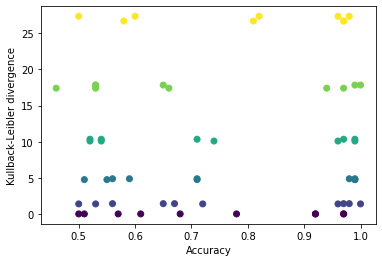

In [109]:
#Getting unique labels
 
u_labels = np.unique(df.epsilon_sigma)

#plotting the results:
for i in u_labels:
    plt.scatter(df_sort[df_sort.epsilon_sigma == i].total_acc , df_sort[df_sort.epsilon_sigma == i].total_kl , c=df_sort[df_sort.epsilon_sigma == i].mean_dist)
    # print(df_sort[df_sort.epsilon_sigma == i].mean_dist)
    # print(df_sort[df_sort.epsilon_sigma == i].epsilon_sigma)
plt.xlabel('Accuracy')
plt.ylabel('Kullback-Leibler divergence')
# plt.legend( np.unique(df_sort.mean_dist), title='Mean distance')
# plt.legend( np.arange(0.1, 3.6, 0.5), title='Mean distance', loc='upper center', bbox_to_anchor=(0.5, -0.2),
#           fancybox=True, shadow=True, ncol=5)
plt.show()

In [112]:
df

,City,Occupation,Blood Type,Dummy
0,Tijuana,Drone security officer,AB,1.0
1,Tijuana,Drone security officer,O,1.0
2,Atlantis,Lawyer,B,1.0
3,Anaheim,Engineer,A,1.0
4,Tijuana,Engineer,A,1.0
...,...,...,...,...
495,Atlantis,Drone security officer,A,1.0
496,Atlantis,Drone security officer,B,1.0
497,Los Angeles,Doctor,B,1.0
498,Atlantis,Engineer,B,1.0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

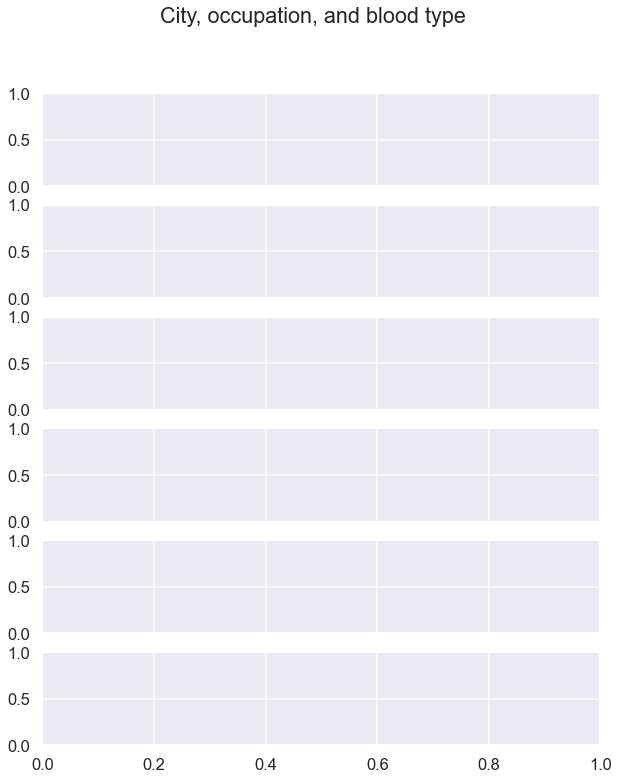

In [119]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns

# Make data
# cities = ['Tijuana','Las Vegas','Los Angeles','Anaheim','Atlantis']
# occupations = ['Doctor','Lawyer','Engineer','Drone security officer']
# bloodtypes = ['A','B','AB','O']
# df = pd.DataFrame({'City': np.random.choice(cities,500),
#                    'Occupation': np.random.choice(occupations,500),
#                    'Blood Type':np.random.choice(bloodtypes,500)})

# # Make a dummy column, otherwise the groupby returns an empty df
# df['Dummy'] = np.ones(500)

# # This is now what I'd like to plot
# grouped = df.groupby(by=['City','Occupation','Blood Type']).count().unstack()

# List of blood types, to use later as categories in subplots
kinds = np.unique(df_sort.mean_dist)

# colors for bar graph
colors = [get_cmap('viridis')(v) for v in np.linspace(0,1,len(kinds))]

sns.set(context="talk")
nxplots = len(np.unique(df_sort.mean_dist))
nyplots = 1
fig, axes = plt.subplots(nxplots,
                         nyplots,
                         sharey=True,
                         sharex=True,
                         figsize=(10,12))

fig.suptitle('City, occupation, and blood type')

# plot the data
for a, b in enumerate(np.unique(df_sort.epsilon_sigma)):
    for i, j in enumerate(np.unique(df_sort.mean_dist)):
        axes[a,i].scatter(df_sort[df_sort.epsilon_sigma == b].total_acc , df_sort[df_sort.epsilon_sigma == b].total_kl ,c=j ,color=colors)
        axes[a,i].xaxis.set_ticks([])

axeslabels = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
axeslabels.set_ylabel('City',rotation='horizontal',y=1,weight="bold")
axeslabels.set_xlabel('Occupation',weight="bold")

# x- and y-axis labels
# for i, j in enumerate(grouped.index.levels[1]):
#     axes[nyplots,i].set_xlabel(j)
# for i, j in enumerate(grouped.index.levels[0]):
#     axes[i,0].set_ylabel(j)

# Tune this manually to make room for the legend
fig.subplots_adjust(right=0.82)

fig.legend([Patch(facecolor = i) for i in colors],
           kinds,
           title="Blood type",
           loc="center right")

In [57]:
np.unique(df_sort.epsilon_sigma)

array([5.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [10]:
# mean_dist_list = np.arange(0.1, 3.0, 0.5)
# with open('Results/total_dict_2022-06-13 13:34:28.347619.json', 'r') as f:
#     json_data = json.load(f)
#     for i in range(len(json_data)):
#         # print(json_data[str(i)]['parameters']['mean_dist'])
#         for m in mean_dist_list:
#             if json_data[str(i)]['parameters']['mean_dist'] == m:
#                 plt.scatter( json_data[str(i)]['results']['acc_mean'], json_data[str(i)]['results']['KL_mean'])
#     plt.legend(mean_dist_list)
#     plt.show()

In [11]:

if __name__ == "__main__":
    directory = os.getcwd()
    if not os.path.isdir('figures'):
        os.makedirs('figures')

    count_fig = 0
    for subdir, dirs, files in os.walk(f'{directory}/results'):
        if 'experiment_' in subdir:
            df_cl = np.array([])
            df_fl = np.array([])
            for file in files:
                if 'fl' in file:
                    df_fl = read_results_file(subdir, file, df_fl)
                elif 'cl' in file:
                    df_cl = read_results_file(subdir, file, df_cl)

            df_fl_mean = np.mean(df_fl, axis=2)
            df_cl_mean = np.mean(df_cl, axis=2)

            plot_loss_functions('figures/fig_experiment_' +
                                str(count_fig) + '.png', df_cl_mean, df_fl_mean)
            count_fig += 1

In [14]:
(0.4699999988079071+0.5+0.6200000047683716+0.5099999904632568+0.5199999809265137)/5

0.5239999949932098

array([ 1.37375522,  1.2551983 , -0.13922887])

In [17]:
np.random.uniform(-1.5, 1.5, 3)

array([-1.41690698,  0.89805302,  0.54647384])